In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Data Cleaning 

In [2]:
skip_rows = [0]  # Rows to skip (0-based index)

df = pd.read_csv('C:/Users/tmanett/Desktop/Grab & Go/Mobile Apps Dashboard (TML-TR-TFC).csv', skip_blank_lines=True, skiprows=skip_rows)

# Remove rows with index 366 to 368
df = df.drop(index=range(366, 369))

# Filter out rows with 'Grand Total' in 'Row Labels' column
df = df[~df['Row Labels'].str.contains('Grand Total', na=False)]

# Convert 'Row Labels' column to datetime format
df['Row Labels'] = pd.to_datetime(df['Row Labels'])
df.set_index('Row Labels', inplace=True)  

# Convert concatenated string values to lists of numbers
df['Average Users (Raps)'] = df['Average Users (Raps)'].apply(lambda x: [float(val) for val in x.split()])
df['Average Users (TFC)'] = df['Average Users (TFC)'].apply(lambda x: [float(val) for val in x.split()])
df['Average Users Leafs'] = df['Average Users Leafs'].apply(lambda x: [float(val) for val in x.split()])

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 585 entries, 2022-01-01 to 2023-08-08
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Average Users (Raps)  585 non-null    object
 1   Average Users (TFC)   585 non-null    object
 2   Average Users Leafs   585 non-null    object
dtypes: object(3)
memory usage: 18.3+ KB


### Active Users Each Month by Team

In [3]:
# Filter data for the date range
start_date = pd.Timestamp('2022-08-01')
end_date = pd.Timestamp('2023-07-31')
df = df.loc[start_date:end_date]

# Convert the cleaned columns to appropriate numeric types
numeric_columns = ['Average Users (Raps)', 'Average Users (TFC)', 'Average Users Leafs']
for col in numeric_columns:
    df[col] = df[col].apply(sum)  # Sum the list of values to get a single value

# Group by month and sum the cleaned columns
grouped_data = df.groupby(df.index.to_period('M')).sum()

grouped_data

,Average Users (Raps),Average Users (TFC),Average Users Leafs
Row Labels,,,
2022-08,1514.0,36134.000000,1201.0
2022-09,4071.0,22982.000000,13374.0
2022-10,96174.5,9115.000000,149589.0
2022-11,99363.0,6359.500000,166136.5
2022-12,168436.0,6559.000000,225276.0
2023-01,141503.5,6202.500000,227311.5
2023-02,116391.5,12930.000000,193253.0
2023-03,184700.5,43585.333334,287981.5
2023-04,66499.5,42605.000000,188079.5


In [4]:
csv_filename = "mobile_metrics1.csv"
grouped_data.to_csv(csv_filename, index=True)

### Bar Plot

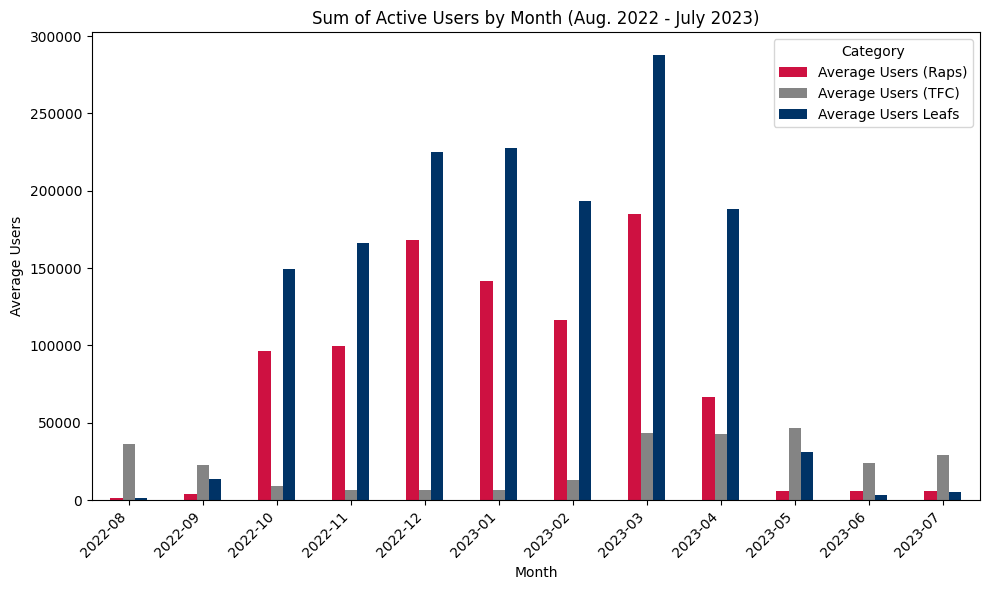

In [9]:
color_codes = ['#CE1141', '#848484', '#003366']

# Create a grouped bar chart
ax = grouped_data.plot(kind='bar', figsize=(10, 6), color=color_codes)
ax.set_title('Sum of Active Users by Month (Aug. 2022 - July 2023)')
ax.set_xlabel('Month')
ax.set_ylabel('Average Users')
ax.legend(title='Category')


plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()

### Total and Average Active Users for Each Team

In [6]:
# Calc sums
sum_leafs = grouped_data['Average Users Leafs'].sum()
sum_raps = grouped_data['Average Users (Raps)'].sum()
sum_tfc = grouped_data['Average Users (TFC)'].sum()

# Calc avg
avg_leafs = grouped_data['Average Users Leafs'].mean()
avg_raps = grouped_data['Average Users (Raps)'].mean()
avg_tfc = grouped_data['Average Users (TFC)'].mean()


print("Sum of Users per Team:")
print("Leafs:", sum_leafs)
print("Raps:", sum_raps)
print("TFC:", sum_tfc)

print("\nAverage Users per Team:")
print("Leafs:", avg_leafs)
print("Raps:", avg_raps)
print("TFC:", avg_tfc)

Sum of Users per Team:
Leafs: 1492018.0
Raps: 895884.5
TFC: 286172.33333399997

Average Users per Team:
Leafs: 124334.83333333333
Raps: 74657.04166666667
TFC: 23847.694444499997
